## Data Wrangling Project #4

--------------
This project is about assessing and cleaning the [@WeRateDogs](https://twitter.com/dog_rates) data

so real data rarely comes clean in this example we are going to the experience the whole Data Wrangling process from the first step which is the `Gathering` to the last step `Cleaning` after that we going to analyze and visualize 

for more info click [here](https://en.wikipedia.org/wiki/WeRateDogs)

----------
__This project is one of the requirements to get the [Udacity Data Analyst NanoDegree](https://www.udacity.com/course/data-analyst-nanodegree--nd002) the steps that are performed in this project is :__

- Read `twitter-archive-enhanced.csv` manually by using `.read_csv` pandas function
- Downloading `image_predictions.tsv` programmatically the url was given to me in the project details on Udacity page
- Query Twitter API for additional information on our `twitter-archive-enhanced.csv` __NOTE__ : I coudn't query the Twitter API for personal issues so the code that is writen below I took it from Udacity project page as well as the output of the code `tweet-json.txt`
- Assessing visually and programmatically all datasets 
- Cleaning all the `Quality` and `Tidiness` issues that I found 
- Storing the resulted dataframe(s) into SQLite database
- Anylyze and visualize

--------
The datasets in this project :
- twitter_archive : where I stored the `twitter-archive-enhanced.csv` data
- image_predections : where I stored `image_predictions.tsv` after downloading and reading it programmatically
- additional_data : additional information that are the result of querying Twitter API __NOTE__ : the data was a json data but stored in a `.txt` file so in order to use the functionality of the json file I loaded it again as a json file by using `.load` json functinon  
- twitter_archive_clean : the clean version of twitter_archive
- image_predections_clean : the clean version of image_predections_clean
- additional_data_clean = the clean version of additional_data_clean
- all_data : the merged version of the three datasets above after cleaning 
------ 
The files in this Projects :
- wrangling-act.ipynb : this workspace that containts all the project's code
- twitter-archive-enhanced.csv : the `csv` that I downloaded manually and contains the data for [@WeRateDogs](https://twitter.com/dog_rates) twitter account
- image_predictions.tsv : the file that I downloaded it programmatically and contains the tweets with images and `neural network algorithms`
- tweet-json.txt : the output from querying Twitter API and holds more information for `twitter-archive-enhanced.csv` 
- twitter_archive_master.db : after assessing and cleaning our data I merged them to be one file and stored them in this file
- wrangle_report.html : report that briefly describes your wrangling efforts
- act_report.html : report that describes my insights and visualization 

# Gather 

In [257]:
# Importing the required libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
import requests
import json
import tweepy
from tweepy import OAuthHandler
from timeit import default_timer as timer
from sqlalchemy import create_engine

In [258]:
# reading the csv file manually 
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [259]:
# The url that was given by udacity to download it programmatically
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url)
# creating the file 
file_name = 'image_predictions.tsv'
if not os.path.exists(file_name):
    with open(file_name, 'wb')as file:
        file.write(r.content)

In [260]:
# storing the tsv file in a DataFrame
image_predictions = pd.read_csv('image_predictions.tsv' , sep='\t')
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### <span style="color:red">NOTE : the below code I got it from Udacity Data Wrangling project page</span>

```python
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

tweet_ids = twitter_archive.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)
```

In [261]:
# loading the data from text file to json file and store the additional info into additional_data
file_name = 'tweet-json.txt'
additional_data_list = []
json_data = [json.loads(line) for line in open(file_name, 'r')]
for key in range(len(json_data)):
    tweet_id = json_data[key]['id']
    retweet_count = json_data[key]['retweet_count']
    favorite_count = json_data[key]['favorite_count']
    #append the info that I need which is only retweet_count and favorite_count 
    additional_data_list.append({'tweet_id' : tweet_id ,
                                 'retweet_count' : retweet_count ,
                                 'favorite_count' : favorite_count})
    
    
additional_data = pd.DataFrame(additional_data_list , columns = ['tweet_id' , 'retweet_count' , 'favorite_count'])
additional_data.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [262]:
print('Twitter archive DataFrame has : ' +str(twitter_archive.shape[0]) +' rows and ' +str(twitter_archive.shape[1])+' columns')
print('Image Prediction DataFrame has : ' +str(image_predictions.shape[0]) +' rows and ' +str(image_predictions.shape[1])+' columns')
print('Additional Data DataFrame has : ' +str(additional_data.shape[0]) +' rows and ' +str(additional_data.shape[1])+' columns')

Twitter archive DataFrame has : 2356 rows and 17 columns
Image Prediction DataFrame has : 2075 rows and 12 columns
Additional Data DataFrame has : 2354 rows and 3 columns


- we have 2075 tweets with images and thats what we need 

# Assess

#### Assessing `twitter_archive` table

In [263]:
# viewing the entire dataframe
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [264]:
#Calculating the duplicated tweet_id
sum(twitter_archive.tweet_id.duplicated())

0

In [265]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [266]:
# Viewing the timestamp values
twitter_archive.timestamp.value_counts()

2016-10-10 16:20:36 +0000    1
2016-07-22 16:28:07 +0000    1
2016-08-04 20:09:17 +0000    1
2016-11-16 01:09:57 +0000    1
2017-03-21 00:22:10 +0000    1
2017-06-07 16:14:40 +0000    1
2016-01-11 03:17:53 +0000    1
2015-11-22 05:17:54 +0000    1
2016-12-04 00:30:29 +0000    1
2016-01-21 02:56:40 +0000    1
2017-07-29 16:00:24 +0000    1
2017-02-03 23:04:02 +0000    1
2017-06-26 19:07:24 +0000    1
2015-11-16 21:54:18 +0000    1
2016-03-12 17:47:45 +0000    1
2015-12-26 17:41:07 +0000    1
2015-12-07 03:45:53 +0000    1
2016-03-10 17:35:20 +0000    1
2015-11-21 01:15:07 +0000    1
2015-12-10 04:18:42 +0000    1
2016-01-02 20:58:09 +0000    1
2017-03-10 18:27:58 +0000    1
2016-01-25 00:26:41 +0000    1
2016-07-04 22:00:12 +0000    1
2017-01-02 18:38:42 +0000    1
2016-08-18 23:55:18 +0000    1
2016-01-27 18:42:06 +0000    1
2015-11-17 02:46:43 +0000    1
2016-07-13 18:26:16 +0000    1
2016-06-13 21:16:49 +0000    1
                            ..
2016-01-31 00:25:18 +0000    1
2016-09-

In [267]:
#Viewing retweeted_status_timestamp values
twitter_archive.retweeted_status_timestamp.unique()

array([nan, '2017-07-19 00:47:34 +0000', '2017-07-15 02:44:07 +0000',
       '2017-02-12 01:04:29 +0000', '2017-06-23 01:10:23 +0000',
       '2017-06-23 16:00:04 +0000', '2015-11-24 03:51:38 +0000',
       '2017-06-19 17:14:49 +0000', '2017-05-21 16:48:45 +0000',
       '2017-05-28 17:23:24 +0000', '2017-06-09 16:22:42 +0000',
       '2017-06-08 03:32:35 +0000', '2017-03-13 00:02:39 +0000',
       '2017-05-02 00:04:57 +0000', '2017-05-27 19:39:34 +0000',
       '2017-05-18 01:17:25 +0000', '2017-05-22 00:28:40 +0000',
       '2017-03-04 00:21:08 +0000', '2017-05-12 16:05:02 +0000',
       '2016-12-07 22:38:52 +0000', '2017-05-05 18:36:06 +0000',
       '2017-05-06 17:49:42 +0000', '2016-08-05 21:19:27 +0000',
       '2017-03-08 18:52:12 +0000', '2017-04-26 02:37:47 +0000',
       '2017-03-23 00:18:10 +0000', '2017-04-24 02:13:14 +0000',
       '2017-03-16 00:00:07 +0000', '2017-04-20 18:14:33 +0000',
       '2017-02-14 23:43:18 +0000', '2017-02-08 17:00:26 +0000',
       '2017-04-01 2

In [268]:
#View the values in source column
twitter_archive.source.unique()

array([ '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'], dtype=object)

Looks like we have only 4 sources 

In [269]:
#how many sources coming from iphone and the other sources
sum(twitter_archive.source.str.contains('iphone')) , sum(~(twitter_archive.source.str.contains('iphone')))

(2221, 135)

in the above cell we now know that most tweets are coming from iphone (the source of the tweet is iphone)

we know that that tweets that are coming from iphone is `2221` tweet

know we need to find the `135` rows that are not from `iphone`

to find the other resources im just going to search by the key word with `.str.contains` function

In [270]:
twitter_archive[twitter_archive.source.str.contains('Twitter Web Client')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
209,852226086759018497,NaN,NaN,2017-04-12 18:25:07 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Meet General. He wasn't content with the quali...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/852226086...,14,10,General,None,None,None,None
270,841314665196081154,NaN,NaN,2017-03-13 15:47:01 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",This is Max. There's no way in h*ck you're tak...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/841314665...,13,10,Max,None,None,None,None
335,832645525019123713,NaN,NaN,2017-02-17 17:38:57 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",There's going to be a dog terminal at JFK Airp...,NaN,NaN,NaN,http://us.blastingnews.com/news/2017/02/jfk-an...,10,10,not,None,None,None,None
352,831315979191906304,NaN,NaN,2017-02-14 01:35:49 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",I couldn't make it to the #WKCDogShow BUT I ha...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/831315979...,13,10,None,None,None,pupper,None
375,828361771580813312,NaN,NaN,2017-02-05 21:56:51 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Beebop and Doobert should start a band 12/10 w...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
444,819238181065359361,NaN,NaN,2017-01-11 17:42:57 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Some happy pupper news to share. 10/10 for eve...,NaN,NaN,NaN,http://us.blastingnews.com/news/2017/01/200-do...,10,10,None,None,None,pupper,None
798,772877495989305348,NaN,NaN,2016-09-05 19:22:09 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",You need to watch these two doggos argue throu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/772877495...,11,10,None,None,None,None,None
828,768970937022709760,NaN,NaN,2016-08-26 00:38:52 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",This is Kirby. His bowl weighs more than him. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/768970937...,12,10,Kirby,None,None,None,None
882,760290219849637889,NaN,NaN,2016-08-02 01:44:48 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",This is Rocco. He's doing his best. 13/10 some...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/760290219...,13,10,Rocco,None,None,None,None
990,748705597323898880,NaN,NaN,2016-07-01 02:31:39 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",#BarkWeek is getting rather heckin terrifying ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/748705597...,13,10,None,None,None,None,None


In [271]:
#how many tweets are coming from Twitter Web Client
sum(twitter_archive.source.str.contains('Twitter Web Client'))

33

ok thats 33 tweets are coming from the twitter Web Client

we need to find the the remaining 102 rows

In [272]:
#all sources that are not from iphone and Twitter Web 
twitter_archive[~(twitter_archive.source.str.contains('Twitter Web Client')) &
                ~(twitter_archive.source.str.contains('iphone'))]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
529,808344865868283904,NaN,NaN,2016-12-12 16:16:49 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Seamus. He's very bad at entering pool...,NaN,NaN,NaN,https://vine.co/v/5QWd3LZqXxd,11,10,Seamus,None,None,None,None
562,802600418706604034,NaN,NaN,2016-11-26 19:50:26 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Bailey. She has mastered the head tilt...,NaN,NaN,NaN,https://vine.co/v/5FwUWjYaW0Y,11,10,Bailey,None,None,None,None
657,791774931465953280,NaN,NaN,2016-10-27 22:53:48 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Vine will be deeply missed. This was by far my...,NaN,NaN,NaN,https://vine.co/v/ea0OwvPTx9l,14,10,None,None,None,None,None
672,789903600034189313,NaN,NaN,2016-10-22 18:57:48 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Ralphy. His dreams were just shattered...,NaN,NaN,NaN,https://vine.co/v/5wPT1aBxPQZ,13,10,Ralphy,None,None,pupper,None
699,786286427768250368,NaN,NaN,2016-10-12 19:24:27 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Arnie. He's afraid of his own bark. 12...,NaN,NaN,NaN,https://vine.co/v/5XH0WqHwiFp,12,10,Arnie,None,None,None,None
713,784183165795655680,NaN,NaN,2016-10-07 00:06:50 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Reginald. He's one magical puppo. Aero...,NaN,NaN,NaN,https://vine.co/v/5ghHLBMMdlV,12,10,Reginald,None,None,None,puppo
714,784057939640352768,NaN,NaN,2016-10-06 15:49:14 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Balto. He's very content. Legendary to...,NaN,NaN,NaN,https://vine.co/v/5gKxeUpuKEr,12,10,Balto,None,None,None,None
731,781655249211752448,NaN,NaN,2016-09-30 00:41:48 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Combo. The daily struggles of being a ...,NaN,NaN,NaN,https://vine.co/v/5rt6T3qm7hL,11,10,Combo,doggo,None,None,None
733,781308096455073793,NaN,NaN,2016-09-29 01:42:20 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...","Pupper butt 1, Doggo 0. Both 12/10 https://t.c...",NaN,NaN,NaN,https://vine.co/v/5rgu2Law2ut,12,10,None,doggo,None,pupper,None
746,780074436359819264,NaN,NaN,2016-09-25 16:00:13 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Here's a doggo questioning his entire existenc...,NaN,NaN,NaN,https://vine.co/v/5nzYBpl0TY2,10,10,None,doggo,None,None,None


In [273]:
#how many tweets are coming from Vine
sum(twitter_archive.source.str.contains('vine'))

91

ok thats 91 are comming from __vine__ , good now we need to find the remaining 11

In [274]:
#all sources that are not from iphone , Twitter Web and vine
twitter_archive[~(twitter_archive.source.str.contains('Twitter Web Client')) &
                ~(twitter_archive.source.str.contains('iphone')) & 
                ~(twitter_archive.source.str.contains('vine'))]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
972,750086836815486976,NaN,NaN,2016-07-04 22:00:12 +0000,"<a href=""https://about.twitter.com/products/tw...",This is Spanky. He was a member of the 2002 US...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/750086836...,12,10,Spanky,None,None,None,None
974,750056684286914561,NaN,NaN,2016-07-04 20:00:23 +0000,"<a href=""https://about.twitter.com/products/tw...",This is Jameson. He had a few too many in the ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/750056684...,11,10,Jameson,None,None,None,None
975,750041628174217216,NaN,NaN,2016-07-04 19:00:33 +0000,"<a href=""https://about.twitter.com/products/tw...",This is Beau. He's trying to keep his daddy fr...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/750041628...,13,10,Beau,None,None,None,None
976,750026558547456000,NaN,NaN,2016-07-04 18:00:41 +0000,"<a href=""https://about.twitter.com/products/tw...",Meet Jax &amp; Jil. Jil is yelling the pledge ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/750026558...,10,10,Jax,None,None,None,None
977,750011400160841729,NaN,NaN,2016-07-04 17:00:26 +0000,"<a href=""https://about.twitter.com/products/tw...",Meet Piper. She's an airport doggo. Please ret...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/750011400...,11,10,Piper,doggo,None,None,None
978,749996283729883136,NaN,NaN,2016-07-04 16:00:22 +0000,"<a href=""https://about.twitter.com/products/tw...",This is Bo. He emanates happiness. 12/10 I cou...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749996283...,12,10,Bo,None,None,None,None
979,749981277374128128,NaN,NaN,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,None,None,None,None
1723,680100725817409536,NaN,NaN,2015-12-24 19:00:23 +0000,"<a href=""https://about.twitter.com/products/tw...",This pupper is not coming inside until she cat...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680100725...,11,10,None,None,None,pupper,None
1724,680085611152338944,NaN,NaN,2015-12-24 18:00:19 +0000,"<a href=""https://about.twitter.com/products/tw...",This is by far the most coordinated series of ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680085611...,12,10,by,None,None,None,None
1725,680070545539371008,NaN,NaN,2015-12-24 17:00:27 +0000,"<a href=""https://about.twitter.com/products/tw...",Say hello to Emmie. She's trapped in an orname...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680070545...,9,10,Emmie,None,None,None,None


In [275]:
#how many tweets are coming from tweetdeck
sum(twitter_archive.source.str.contains('tweetdeck'))

11

and 11 coming from tweetdeck 

ok finally we got all 135 rows that are not from `iphone`

---------
we come to know now that in the `source` column we have 4 sources :
- iphone
- Twitter Web Client
- vine
- tweetDeck

-------
__NOTE__ : I used a text editor (sublime Text) to find all 4 sources by searching with `index` and with `find`

In [276]:
#Viewing the rating denominator values
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

Notice we have 1 rating dennominator with the value of 0 after checking the json file manually using `sublime text` I found this __" "full_text": "@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho"__

In [277]:
#Viewing the rating numerator
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [278]:
#unique names
twitter_archive.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver', 'Jim',
       'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Lilly',
       'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald',
       'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'a',
       'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack',
       'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow', 'Terrance', 'Aja',
       'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose',
       'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian', 'Walter', 'Sierra',
       'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover', 'Napolean', 'Dawn',
       'Boomer', 'Cody', 'Rumble', 'Clifford', 'quite', 'Dewey', 'Scout',
       'Gizmo', 'Cooper', 'Harold', 'Shikha', 'Jamesy', 'Lili', 'Sammy',
       'Meatball', 'Paisley', 'Albus', 'Neptune', '

In [279]:
#null urls
twitter_archive[twitter_archive.expanded_urls.isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
185,856330835276025856,NaN,NaN,2017-04-24 02:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Jenna_Marbles: @dog_rates Thanks for ratin...,8.563302e+17,66699013.0,2017-04-24 02:13:14 +0000,NaN,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None


In [280]:
#checking for invalid entries for dog styles
twitter_archive[(twitter_archive.doggo == 'doggo') & (twitter_archive.puppo == 'puppo')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
191,855851453814013952,NaN,NaN,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/855851453...,13,10,None,doggo,None,None,puppo


In [281]:
#checking for invalid entries for dog styles
twitter_archive[(twitter_archive.doggo == 'doggo') & (twitter_archive.floofer == 'floofer')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
200,854010172552949760,NaN,NaN,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/854010172...,11,10,None,doggo,floofer,None,None


In [282]:
#checking for invalid entries for dog styles
twitter_archive[(twitter_archive.doggo == 'doggo') & (twitter_archive.pupper == 'pupper')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
460,817777686764523521,NaN,NaN,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Dido. She's playing the lead role in ""...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/817777686...,13,10,Dido,doggo,None,pupper,None
531,808106460588765185,NaN,NaN,2016-12-12 00:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have Burke (pupper) and Dexter (doggo)...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/808106460...,12,10,None,doggo,None,pupper,None
565,802265048156610565,7.331095e+17,4.196984e+09,2016-11-25 21:37:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Like doggo, like pupper version 2. Both 11/10 ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/802265048...,11,10,None,doggo,None,pupper,None
575,801115127852503040,NaN,NaN,2016-11-22 17:28:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bones. He's being haunted by another d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/801115127...,12,10,Bones,doggo,None,pupper,None
705,785639753186217984,NaN,NaN,2016-10-11 00:34:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pinot. He's a sophisticated doggo. You...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/785639753...,10,10,Pinot,doggo,None,pupper,None
733,781308096455073793,NaN,NaN,2016-09-29 01:42:20 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...","Pupper butt 1, Doggo 0. Both 12/10 https://t.c...",NaN,NaN,NaN,https://vine.co/v/5rgu2Law2ut,12,10,None,doggo,None,pupper,None
778,775898661951791106,NaN,NaN,2016-09-14 03:27:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: Like father (doggo), like son (...",7.331095e+17,4.196984e+09,2016-05-19 01:38:16 +0000,https://twitter.com/dog_rates/status/733109485...,12,10,None,doggo,None,pupper,None
822,770093767776997377,NaN,NaN,2016-08-29 03:00:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is just downright precious...,7.410673e+17,4.196984e+09,2016-06-10 00:39:48 +0000,https://twitter.com/dog_rates/status/741067306...,12,10,just,doggo,None,pupper,None
889,759793422261743616,NaN,NaN,2016-07-31 16:50:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Meet Maggie &amp; Lila. Maggie is the doggo, L...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/759793422...,12,10,Maggie,doggo,None,pupper,None
956,751583847268179968,NaN,NaN,2016-07-09 01:08:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Please stop sending it pictures that don't eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/751583847...,5,10,None,doggo,None,pupper,None


in this finding and after searching some rows we just can't clean them because they come with null and there isn't enough data to find whats missing

#### Assessing `image_predictions` table

In [283]:
#Viewing the whole image_prediction dataset
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [284]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [285]:
#checking for duplicated tweet_id
image_predictions.tweet_id.duplicated().any()

False

In [286]:
#Viewing the img_num values
image_predictions.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [287]:
#urls that doesn't contain .jpg on them (which means they are not jpg_url)
image_predictions[(~image_predictions.jpg_url.str.contains('.jpg'))]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
320,671789708968640512,https://pbs.twimg.com/tweet_video_thumb/CVKtH-...,1,dalmatian,0.114259,True,teddy,0.062275,False,steam_locomotive,0.049700,False
815,692752401762250755,https://pbs.twimg.com/tweet_video_thumb/CZ0mhd...,1,Samoyed,0.471276,True,Siberian_husky,0.158850,True,Eskimo_dog,0.138672,True


we have two rows with invalid url it's acually a video not a photo

#### Assessing `additional_data` table

In [288]:
#Viewing the whole additional_data dataset
additional_data

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
5,891087950875897856,3261,20562
6,890971913173991426,2158,12041
7,890729181411237888,16716,56848
8,890609185150312448,4429,28226
9,890240255349198849,7711,32467


In [289]:
additional_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [290]:
# checking for duplicated tweet_id
additional_data.tweet_id.duplicated().any()

False

In [291]:
#Viewing the sorted retweet values starting with the lowest
additional_data.retweet_count.sort_values()

290         0
1293        2
273         3
341         3
112         3
29          4
1078        6
54          7
426        10
63         10
2296       14
2337       16
185        17
1521       19
178        20
2317       23
211        23
2187       25
1235       26
187        27
408        31
100        31
610        32
2258       34
2222       34
2257       37
2335       37
284        38
883        38
965        39
        ...  
309     24013
528     24069
449     24069
1075    24319
888     24319
653     24514
1623    24514
117     25661
168     25661
114     27680
623     27728
1764    30742
458     31314
302     31314
1828    31989
134     32883
131     32883
868     33421
164     33421
536     37911
154     37911
445     42228
448     42228
65      45849
412     48265
816     52360
1077    52360
259     56625
533     56625
1037    79515
Name: retweet_count, Length: 2354, dtype: int64

In [292]:
#Viewing the sorted favorite values starting with the lowest
additional_data.favorite_count.sort_values()

484          0
585          0
164          0
588          0
909          0
170          0
676          0
670          0
385          0
593          0
381          0
594          0
595          0
681          0
179          0
181          0
597          0
598          0
184          0
599          0
600          0
924          0
601          0
193          0
194          0
668          0
602          0
596          0
159          0
158          0
         ...  
552      49774
447      49960
55       50199
53       51522
135      54720
868      55016
122      55098
623      55683
394      56413
7        56848
458      57622
364      58302
1764     61794
153      66437
1828     67100
37       68152
22       69871
76       71144
355      73397
41       74423
1077     75163
168      75193
536      75639
114      85011
448      95450
134     106827
533     107015
65      107956
1037    131075
412     132810
Name: favorite_count, Length: 2354, dtype: int64

## __Quality Issues__

`twitter_archive` table :
- `name` column have invalid names such as ('a' , 'the' , 'an' , 'not' , 'such' , '0' , 'all' and 'by')
- change datatype for the following columns ('tweet_id') to `object` and ('timestamp') column to `datetime` 
- change `source` column to hold only the device name , as shown above I managed to figure out all the sources so the `source` column will hold only the source name. `sources('iphone' , 'Twitter Web Client' , 'vine' and 'tweetdeck')` 
- no null entries for `name` `doggo` `floofer`	`pupper` `puppo` columns (None instead of NaN)
- row 313 has invalid rating 960/0 the correct rating is 13/10 
- `expanded_url` column has a missing values
- some dogs have two styles by mistake 
- row 531 and 889 have two dogs so we have to change the name column for them 

`image_predictions` table :
- `tweet_id` columns need to be changed from (int) to (object)
- two invalid `jpg_url` links , row `320` and row `815` replace them with nulls since we don't know the url

`additional_data` table :
- `tweet_id` is int instead of object


## __Tidiness Issues__
- in `twitter_archive_clean` table we have 4 columns that describe the dogs instead we can make it two their name and their style only 
- table `additional_data_clean` must be joined with `twitter_archive_clean` since they share the same information 
- drop the following columns ('in_reply_to_status_id' , 'in_reply_to_user_id' , 'retweeted_status_id'	'retweeted_status_user_id' , 'retweeted_status_timestamp') since it's with alot of missing values and we don't need it for analysis and visualization
- table `twitter_archive_clean` must be joined with `image_predections` since we only need the tweets with the images 

## Clean

In [293]:
#taking copy for every dataset before cleaning 
twitter_archive_clean = twitter_archive.copy()
image_predictions_clean = image_predictions.copy()
additional_data_clean = additional_data.copy()

##### Quality Cleaning

##### 1. `twitter_archive` Name column have invalid names such as ('a' , 'the' , 'an' , 'not' , 'such' , '0' , 'all' , 'just' and 'by')

###### Define

 i'm just going to convert them to nulls since we don't know their true names

##### Code

In [294]:
#replacing to null values by using .replace
twitter_archive_clean.name = twitter_archive_clean.name.replace(['a' ,'the' , 'an' , 'not' ,   #null value
                                                                 'such' , '0' , 'all' , 'by' , 'just' ] , np.nan)

##### Test

In [295]:
#seraching for the invalid names 
twitter_archive_clean[(twitter_archive_clean.name == 'a') |(twitter_archive_clean.name == 'the')|(twitter_archive_clean.name == 'an')|
               (twitter_archive_clean.name == 'not')|(twitter_archive_clean.name == 'such')| (twitter_archive_clean.name == '0')|
               (twitter_archive_clean.name == 'all')|(twitter_archive_clean.name == 'by')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [296]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2277 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

##### 2.`twitter_archive` change datatype for the following columns ('tweet_id') to object and ('timestamp') column to datetime

##### Define

- changing tweet_id column by using `pandas` function `.astype` 
- changing 'timestamp' column to datetime by using `pandas` function 
`.to_datetime`

##### Code

In [297]:
twitter_archive_clean['tweet_id'] = twitter_archive_clean['tweet_id'].astype(str)
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean['timestamp'])

##### Test

In [298]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2277 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](

##### 3.change source column to hold only the device name 

##### Define

I'm going to change the source column to hold only the source name __('iphone' , 'Twitter Web Client' , 'vine' and 'tweetdeck')__

##### Code

In [299]:
#filtering the rows that contains "iphone" and then replace them with "iPhone"
filter_iphone = twitter_archive_clean.source[twitter_archive_clean.source.str.contains('iphone')]
twitter_archive_clean.source = twitter_archive_clean.source.replace(filter_iphone , 'iPhone')

#filtering the rows that contains "Twitter Web Client" and then replace them with "Twitter Web Client"
filter_Twitter_Web_Client = twitter_archive_clean.source[twitter_archive_clean.source.str.contains('Twitter Web Client')]
twitter_archive_clean.source = twitter_archive_clean.source.replace(filter_Twitter_Web_Client, 'Twitter Web Client')

#filtering the rows that contains "vine" and then replace them with "Vine"
filter_vine = twitter_archive_clean.source[twitter_archive_clean.source.str.contains('vine')]
twitter_archive_clean.source = twitter_archive_clean.source.replace(filter_vine, 'Vine')

#filtering the rows that contains "tweetdeck" and then replace them with "TweetDeck"
filter_tweet_deck = twitter_archive_clean.source[twitter_archive_clean.source.str.contains('tweetdeck')]
twitter_archive_clean.source = twitter_archive_clean.source.replace(filter_tweet_deck, 'TweetDeck')

##### Test

In [300]:
#Viewing the unique values for the source column
twitter_archive_clean.source.unique()

array(['iPhone', 'Twitter Web Client', 'Vine', 'TweetDeck'], dtype=object)

In [301]:
twitter_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,iPhone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,iPhone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,iPhone,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,iPhone,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


##### 4. `twitter_archive` no null entries for name doggo floofer  pupper puppo columns (None instead of NaN)

##### Define

Replacing the `None` values with null values by using the `replace` pandas function 

##### Code

In [302]:
#replacing None with np.nan(null values)
twitter_archive_clean.name.replace('None' , np.nan , inplace=True)
twitter_archive_clean.doggo.replace('None' , np.nan , inplace=True)
twitter_archive_clean.floofer.replace('None' , np.nan , inplace=True)
twitter_archive_clean.pupper.replace('None' , np.nan , inplace=True)
twitter_archive_clean.puppo.replace('None' , np.nan , inplace=True)

##### Test

In [303]:
#Viewing the first 10 rows to check for null entries
twitter_archive_clean.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,iPhone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,iPhone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,NaN,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,iPhone,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,NaN,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,iPhone,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,NaN,NaN,NaN
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17,iPhone,Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,NaN,NaN,NaN,NaN,NaN
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12,iPhone,Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,NaN,NaN,NaN,NaN
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40,iPhone,When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,NaN,NaN,NaN,NaN,NaN
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51,iPhone,This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,NaN,NaN,NaN,NaN
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51,iPhone,This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,NaN,NaN,NaN


In [304]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          1532 non-null object
doggo                         97 non-null object
floofer                       10 non-null object
pupper                        257 non-null object
puppo                         30 non-null object
dtypes: datetime64[ns](1), flo

##### 5. `twitter_archive` row 313 has invalid rating 960/0 the correct rating is 13/10 ( I found this with the help of sublime text FIND)

##### Define

changing the rating numerator and rating denominator of the row 313 by using `.at` 

##### Code

In [305]:
#changing the value by getting the index of the row and the name of the column
twitter_archive_clean.at[313 , 'rating_numerator'] = 13
twitter_archive_clean.at[313 , 'rating_denominator'] = 10

##### Test

In [306]:
#Viewing row 313 info
twitter_archive_clean.iloc[[313]]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03,iPhone,@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,13,10,NaN,NaN,NaN,NaN,NaN


see `expanded_url` in the above output I'm going to use it as a test in the next Quality issue

##### 6. `twitter_archive` expanded_url column has a missing values

##### Define

All `expanded_url` nulls can be fixed by appending the tweet_id of the corresponding  `expanded_url` null value with the tweet address for the [@WeRateDogs](https://twitter.com/dog_rates) twitter page https://twitter.com/dog_rates/status/

##### Code

In [307]:
#here I filled the null values with None to ease the search
twitter_archive_clean.expanded_urls = twitter_archive_clean.expanded_urls.fillna('None')

In [308]:
#for loop that iterate over the whole dataset if null value was found in expanded_url column append it's tweet_id
#with the tweet_url
tweet_url = 'https://twitter.com/dog_rates/status/'
for i in range(len(twitter_archive_clean)):
    if(twitter_archive_clean.expanded_urls.loc[[i]].any() == 'None'):
        twitter_archive_clean.at[i , 'expanded_urls'] = tweet_url + twitter_archive_clean.tweet_id.loc[i]
    else:
        twitter_archive_clean.expanded_urls

##### Test

In [309]:
#row 313 expanded_url was null
twitter_archive_clean.loc[[313]]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03,iPhone,@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835246439...,13,10,NaN,NaN,NaN,NaN,NaN


##### 7. `twitter_archive` some dogs have two styles by mistake

##### Define 

Some dogs have two styles by mistake the issue caused this is sometimes the text says (this looks like doggo but it's actually a floofer) .

I found this in row 200 while searching the `json_data.txt` manually __"At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl."__

so I'm going to replace the `the wrong entry` with null

this case was accured on these rows :

remove `doggo` from :
- row 191
- row 200
- row 575

remove `pupper`
- row 705

__NOTE__ : all this finding by searching in sublime text manually

In [310]:
#Before the change
print(twitter_archive_clean.doggo.iloc[191])
print(twitter_archive_clean.doggo.iloc[200])
print(twitter_archive_clean.doggo.iloc[575])
print(twitter_archive_clean.pupper.iloc[705])

doggo
doggo
doggo
pupper


##### Code

In [311]:
#Removing doggo by index and column name 
twitter_archive_clean.at[191 , 'doggo'] = np.nan
twitter_archive_clean.at[200 , 'doggo'] = np.nan
twitter_archive_clean.at[575 , 'doggo'] = np.nan

In [312]:
#Removing pupper by index and column name 
twitter_archive_clean.at[705 , 'pupper'] = np.nan

##### Test

In [313]:
#After the change
print(twitter_archive_clean.doggo.iloc[191])
print(twitter_archive_clean.doggo.iloc[200])
print(twitter_archive_clean.doggo.iloc[575])
print(twitter_archive_clean.pupper.iloc[705])

nan
nan
nan
nan


##### 8. `twitter_archive` row 531 and 889 have two dogs so we have to change the name column for them

##### Define

row 531 :the two dogs names are Burke(pupper) and Dexter(doggo)

row 889 : the two dogs names are Magie(doggo) and Lila(pupper)

__NOTE__ : all this finding by searching in sublime text manually

In [314]:
#Viewing before the change
print(twitter_archive_clean.iloc[[531]].name) , print(twitter_archive_clean.iloc[[889]].name)

531    NaN
Name: name, dtype: object
889    Maggie
Name: name, dtype: object


(None, None)

##### Code

In [315]:
#Chaniging the value for row 531 by the row index and the column name 
twitter_archive_clean.at[531 , 'name'] = 'Burke and Dexter'

In [316]:
#Chaniging the value for row 889 by the row index and the column name 
twitter_archive_clean.at[889 , 'name'] = 'Magie and Lila'

##### Test

In [317]:
#Viewing after the change
print(twitter_archive_clean.iloc[[531]].name) , print(twitter_archive_clean.iloc[[889]].name)

531    Burke and Dexter
Name: name, dtype: object
889    Magie and Lila
Name: name, dtype: object


(None, None)

##### 9.  `image_predictions` tweet_id columns need to be changed from (int) to (object)

##### Define

I'm going to change the Data Type of the `tweet_id` column by using `apply` function

##### Code

In [318]:
image_predictions_clean.tweet_id = image_predictions_clean.tweet_id.apply(str)

##### Test

In [319]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


##### 10.  `image_predictions` two invalid jpg_url links , row 320 and row 815 replace them with nulls since we don't know the url

##### Define

Since they are not valid `jpg` url I'm just going to replace them with nulls 

##### Code

In [320]:
#changing the value by using the row index and column name 
image_predictions_clean.at[320 , 'jpg_url'] = np.nan 
image_predictions_clean.at[815 , 'jpg_url'] = np.nan

##### Test

In [321]:
#Viewing the column that doesn't have ".jpg" on them
image_predictions_clean[~(image_predictions.jpg_url.str.contains('.jpg'))]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
320,671789708968640512,NaN,1,dalmatian,0.114259,True,teddy,0.062275,False,steam_locomotive,0.049700,False
815,692752401762250755,NaN,1,Samoyed,0.471276,True,Siberian_husky,0.158850,True,Eskimo_dog,0.138672,True


##### 11. `additional_data` tweet_id is int instead of object

##### Define

I'm going to change the data type of the column `tweet_id` by using `.astype` function

##### Code

In [322]:
additional_data_clean['tweet_id'] = additional_data_clean.tweet_id.astype(str)

##### Test

In [323]:
additional_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null object
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.2+ KB


### Tidiness Cleaning 

##### 1. in twitter_archive table we have 4 columns that describe the dogs instead we can make it two their name and their style only

##### Define

First I'm going to add new column with the name of `style` and then I'm going to merge the (doggo , floofer , pupper , puppo) columns into the ` style` column so they can only be one column that holds the style of the dog 

I used [This for the joining](https://stackoverflow.com/questions/33098383/merge-multiple-column-values-into-one-column-in-python-pandas) 



##### Code

In [324]:
#applying the lambda function on columns (doggo , floofer , pupper , puppo) 
#lambda function : drops the nulls and join all the values together in one column
twitter_archive_clean['style'] = twitter_archive_clean[twitter_archive_clean.columns[13:]].apply(
    lambda x: ''.join(x.dropna().astype(str)) , axis = 1)
#dropping (doggo , floofer , pupper , puppo) columns
twitter_archive_clean.drop(twitter_archive_clean.columns[13:17] , axis = 1 , inplace = True)

In [325]:
#replacing white spaces with null
twitter_archive_clean = twitter_archive_clean.replace(r'^\s*$', np.nan, regex=True)

##### Test

In [326]:
twitter_archive_clean.iloc[0:18]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,style
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,iPhone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,iPhone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,iPhone,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,iPhone,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17,iPhone,Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,NaN,NaN
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12,iPhone,Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,NaN
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40,iPhone,When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,NaN,NaN
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51,iPhone,This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,NaN
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51,iPhone,This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo


In [327]:
#Viewing random sample
twitter_archive_clean.iloc[727]

tweet_id                                                     782305867769217024
in_reply_to_status_id                                                       NaN
in_reply_to_user_id                                                         NaN
timestamp                                                   2016-10-01 19:47:08
source                                                                   iPhone
text                          This is Sampson. He just graduated. Ready to b...
retweeted_status_id                                                         NaN
retweeted_status_user_id                                                    NaN
retweeted_status_timestamp                                                  NaN
expanded_urls                 https://twitter.com/dog_rates/status/782305867...
rating_numerator                                                             12
rating_denominator                                                           10
name                                    

##### 2. table additional_data must be joined with twitter_archive since they share the same information

##### Define

I'm going to merge the `twitter_archive_clean` with `additional_data` tables on __tweet_id__ and then change the data type of the `retweet_count` and `favorite_count` to int 

we know that we have two missing values in `additional_data` table so I'm just going to fill them with the mean

In [328]:
# .info before merging  
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2356 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          1533 non-null object
style                         380 non-null object
dtypes: datetime64[ns](1), float64(4), int64(2), object(7)
memory usage: 257.8+ KB


In [329]:
print(twitter_archive_clean.shape) , print(additional_data_clean.shape)

(2356, 14)
(2354, 3)


(None, None)

we are going to have to missing values for `retween_count` and `favorite_count` so I'm just going to fill them with the mean

##### Code

In [330]:
#left Merging the two datasets together on tweet_id 
twitter_archive_clean = pd.merge(twitter_archive_clean, additional_data_clean,
                            on='tweet_id', how='left')

In [331]:
#The mean for retweet_count
mean_retweet_count = twitter_archive_clean.retweet_count.mean()
#Filling the nulls with the mean
twitter_archive_clean.retweet_count.fillna(mean_retweet_count , inplace = True)

#The mean for favorite_count
mean_favorite_count = twitter_archive_clean.favorite_count.mean()
#Filling the nulls with the mean
twitter_archive_clean.favorite_count.fillna(mean_favorite_count , inplace = True)

In [332]:
#Changing the type of retweet_count and favorite_count to int 
twitter_archive_clean['retweet_count'] = twitter_archive_clean['retweet_count'].astype(int)

twitter_archive_clean['favorite_count'] = twitter_archive_clean['favorite_count'].astype(int)

##### Test

In [333]:
twitter_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,style,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,8853,39467
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,iPhone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,6514,33819
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,iPhone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,4328,25461
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,iPhone,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,8964,42908
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,iPhone,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,9774,41048


In [334]:
# .info() after merging
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 16 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2356 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          1533 non-null object
style                         380 non-null object
retweet_count                 2356 non-null int64
favorite_count                2356 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(4), object(7)
memory usage: 312.

##### 3. drop the following columns ('in_reply_to_status_id' , 'in_reply_to_user_id' , 'retweeted_status_id' 'retweeted_status_user_id' , 'retweeted_status_timestamp') since it's with alot of missing values and we don't need it for analysis and visualization

##### Define

Dropping the above columns by `.drop` pandas function

##### Code

In [335]:
#drop all the selected columns using .drop function 
twitter_archive_clean = twitter_archive_clean.drop(['in_reply_to_status_id' ,
                                                     'in_reply_to_user_id' ,
                                                     'retweeted_status_id',
                                                     'retweeted_status_user_id' ,
                                                     'retweeted_status_timestamp'] , axis = 1)

##### Test

In [336]:
#Listing all the columns 
list(twitter_archive_clean)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'style',
 'retweet_count',
 'favorite_count']

##### 4. table twitter_archive_clean must be joined with image_predections since we only need the tweets with the images

##### Define

I'm going to merge `twitter_archive_clean` with `image_predections` by using .`merge()` on tweet_id

##### Code

In [337]:
# merging the twitter_archive_clean with image_prediction_clean on tweet_id
all_data = pd.merge(image_predictions_clean , twitter_archive_clean ,
                                   on = 'tweet_id' , how = 'left')

##### Test

In [338]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2074
Data columns (total 22 columns):
tweet_id              2075 non-null object
jpg_url               2073 non-null object
img_num               2075 non-null int64
p1                    2075 non-null object
p1_conf               2075 non-null float64
p1_dog                2075 non-null bool
p2                    2075 non-null object
p2_conf               2075 non-null float64
p2_dog                2075 non-null bool
p3                    2075 non-null object
p3_conf               2075 non-null float64
p3_dog                2075 non-null bool
timestamp             2075 non-null datetime64[ns]
source                2075 non-null object
text                  2075 non-null object
expanded_urls         2075 non-null object
rating_numerator      2075 non-null int64
rating_denominator    2075 non-null int64
name                  1421 non-null object
style                 321 non-null object
retweet_count         2075 non-n

## Storing Data

##### Define

I'm going to Store the resulted dataframe(s) into SQLite database

##### Code

In [339]:
# Create SQLAlchemy Engine and empty bestofrt database
engine = create_engine('sqlite:///twitter_archive_master.db')

In [340]:
#Checking for file if not found create new one
if not os.path.exists('twitter_archive_master.db'):
    all_data.to_sql('master' , engine , index= False)

##### Test

In [341]:
#Checking our table in the database by performing select * query
select_all = pd.read_sql('select * from master' , engine)
select_all.sample(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,...,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,style,retweet_count,favorite_count
868,697596423848730625,https://pbs.twimg.com/media/Ca5cPrJXIAImHtD.jpg,1,Shetland_sheepdog,0.621668,1,collie,0.366578,1,Pembroke,...,2016-02-11 01:42:02.000000,iPhone,Here's a pupper with a piece of pizza. Two of ...,https://twitter.com/dog_rates/status/697596423...,11,10,None,pupper,1425,3306
529,676811746707918848,https://pbs.twimg.com/media/CWSEsO9WwAAX-fZ.jpg,1,Chihuahua,0.440916,1,Pomeranian,0.345806,1,cocker_spaniel,...,2015-12-15 17:11:09.000000,iPhone,Say hello to Penny &amp; Gizmo. They are pract...,https://twitter.com/dog_rates/status/676811746...,9,10,Penny,None,469,1536
1101,720785406564900865,https://pbs.twimg.com/media/CgC-gMCWcAAawUE.jpg,1,Chihuahua,0.896422,1,dingo,0.027929,0,kelpie,...,2016-04-15 01:26:47.000000,iPhone,This is Archie. He hears everything you say. D...,https://twitter.com/dog_rates/status/720785406...,12,10,Archie,None,866,3400
2057,888804989199671297,https://pbs.twimg.com/media/DFWra-3VYAA2piG.jpg,1,golden_retriever,0.469760,1,Labrador_retriever,0.184172,1,English_setter,...,2017-07-22 16:56:37.000000,iPhone,This is Zeke. He has a new stick. Very proud o...,https://twitter.com/dog_rates/status/888804989...,13,10,Zeke,None,4559,26080
1046,713175907180089344,https://pbs.twimg.com/media/CeW1tERWAAAA9Q2.jpg,1,timber_wolf,0.503788,0,malamute,0.430624,1,Siberian_husky,...,2016-03-25 01:29:21.000000,iPhone,Say hello to Opie and Clarkus. Clarkus fell as...,https://twitter.com/dog_rates/status/713175907...,10,10,Opie,None,1630,4851
1515,786709082849828864,https://pbs.twimg.com/media/CurzvFTXgAA2_AP.jpg,1,Pomeranian,0.467321,1,Persian_cat,0.122978,0,chow,...,2016-10-13 23:23:56.000000,iPhone,"This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,7069,20296
729,686606069955735556,https://pbs.twimg.com/media/CYdQktMWsAEI29_.jpg,1,Labrador_retriever,0.320012,1,Ibizan_hound,0.208172,1,Saluki,...,2016-01-11 17:50:18.000000,iPhone,"Meet Horace. He was practicing his levitation,...",https://twitter.com/dog_rates/status/686606069...,10,10,Horace,None,607,2071
98,667766675769573376,https://pbs.twimg.com/media/CURiQMnUAAAPT2M.jpg,1,fire_engine,0.883493,0,tow_truck,0.074734,0,jeep,...,2015-11-20 18:09:16.000000,Twitter Web Client,This is Calvin. He is a Luxembourgian Mayo. Ha...,https://twitter.com/dog_rates/status/667766675...,9,10,Calvin,None,243,476
1788,829861396166877184,https://pbs.twimg.com/media/C4RCiIHWYAAwgJM.jpg,1,Border_terrier,0.394486,1,Staffordshire_bullterrier,0.376574,1,American_Staffordshire_terrier,...,2017-02-10 01:15:49.000000,iPhone,This is Mia. She already knows she's a good do...,https://twitter.com/dog_rates/status/829861396...,12,10,Mia,None,2243,13441
201,669682095984410625,https://pbs.twimg.com/media/CUswUBRUAAAahAo.jpg,1,Christmas_stocking,0.188397,0,studio_couch,0.086887,0,bookcase,...,2015-11-26 01:00:28.000000,iPhone,Meet Louie. He just pounded that bottle of win...,https://twitter.com/dog_rates/status/669682095...,9,10,Louie,None,146,375


In [342]:
select_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 22 columns):
tweet_id              2075 non-null object
jpg_url               2073 non-null object
img_num               2075 non-null int64
p1                    2075 non-null object
p1_conf               2075 non-null float64
p1_dog                2075 non-null int64
p2                    2075 non-null object
p2_conf               2075 non-null float64
p2_dog                2075 non-null int64
p3                    2075 non-null object
p3_conf               2075 non-null float64
p3_dog                2075 non-null int64
timestamp             2075 non-null object
source                2075 non-null object
text                  2075 non-null object
expanded_urls         2075 non-null object
rating_numerator      2075 non-null int64
rating_denominator    2075 non-null int64
name                  1424 non-null object
style                 321 non-null object
retweet_count         2075 non-null i

## Analyzing and Visualizing 

- How many tweets with image rating equals to or more than 1 (Bar Chart)
- Does `retweet_count` and `favorite_count` impact each other (does they have strong relation)? (Scatter PLot)
- What's the nueral network algorithm accuracy in it's first , second and last predictions (Line Chart)

Set up the plotting 

to increase the font size I used this [stackoverflow](https://stackoverflow.com/questions/3899980/how-to-change-the-font-size-on-a-matplotlib-plot) page

In [343]:
#Font size and background style
plt.rcParams.update({'font.size' : 20})
sns.set_style('darkgrid')

__How many tweets have image rating equals or more than 1 (Bar Chart)__

In [344]:
#filtering the tweets that have more than or equal to 1 rating (Good Rating)
mask1 = all_data[all_data.rating_numerator >=
                                all_data.rating_denominator].count()['tweet_id']
#filtering the tweets the have less that one rating (Bad Rating)
mask2 = all_data[all_data.rating_numerator <
                                all_data.rating_denominator].count()['tweet_id']
mask1 , mask2

(1659, 416)

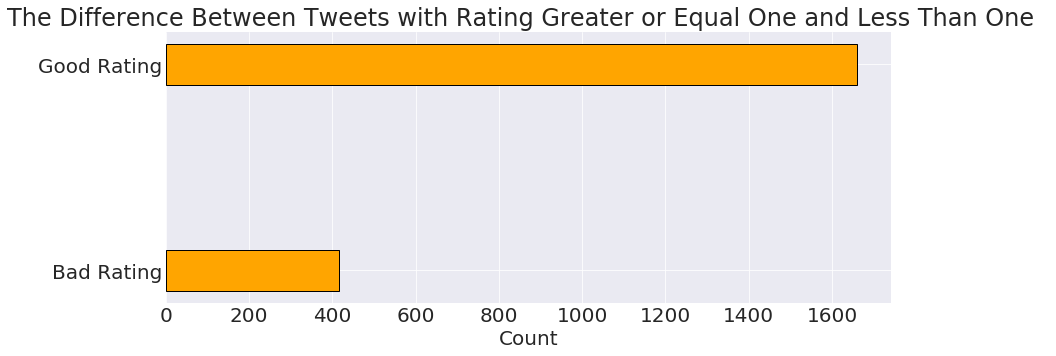

In [345]:
#Plotting the bar chart
plt.figure(figsize=(13,5))
plt.barh(['Good Rating','Bad Rating'] ,[mask1 , mask2]  , height = 0.2 , color = 'orange', edgecolor = ['black' , 'black'])
plt.title('The Difference Between Tweets with Rating Greater or Equal One and Less Than One  ')
plt.xlabel('Count')
plt.show()

__Does retweet_count and favorite_count impact each other (does they have strong relation)? (Scatter PLot)__ 

 [This](https://www.kite.com/python/answers/how-to-plot-a-linear-regression-line-on-a-scatter-plot-in-python) helped me to draw the line and [this](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html) for understanding the `.polyfit` NumPy function

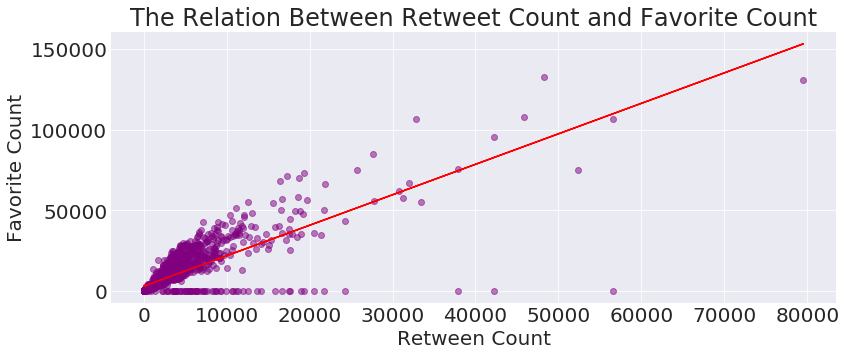

In [346]:
#Plotting the scatter plot
x = all_data.retweet_count
y = all_data.favorite_count
plt.figure(figsize=(13,5))
plt.scatter(x , y , color='purple' , alpha = 0.5 )
plt.xlabel('Retween Count')
plt.ylabel('Favorite Count')
plt.title('The Relation Between Retweet Count and Favorite Count')
m , b = np.polyfit(x , y , deg = 1 )
plt.plot(x , m*x + b , color = 'Red')
plt.show()

Looks like they have strong positve correlation

__What's the nueral network algorithm accuracy in it's first , second and last predictions__

In [347]:
#Moving Average for the first prediction in the algorthim (Moving Average for each 50 values)
Algorithm1 = []
for i in range(int(len(all_data)/50)):
    i *= 50
    Algorithm1.append(all_data.p1_conf.iloc[i:i+50].mean())
Algorithm1

[0.53701500800000002,
 0.61774972000000006,
 0.52580270400000007,
 0.55926613999999997,
 0.5224607,
 0.59094832199999991,
 0.57578315400000002,
 0.59282001999999989,
 0.56372838000000003,
 0.56841179999999991,
 0.58848745199999997,
 0.53300541999999995,
 0.58174641999999988,
 0.57673812399999991,
 0.58351916000000004,
 0.48740171399999993,
 0.56815691999999995,
 0.52657441999999999,
 0.59180670000000002,
 0.60801322400000013,
 0.68103072000000009,
 0.56934191200000006,
 0.56846364000000005,
 0.6272121799999999,
 0.62945203999999999,
 0.62335138000000012,
 0.61700089999999996,
 0.58571617600000014,
 0.57856439999999998,
 0.62416667999999997,
 0.68082082799999999,
 0.59683788000000004,
 0.60148990800000002,
 0.64158833000000015,
 0.61161652,
 0.62287727999999998,
 0.61736589200000003,
 0.68313665999999984,
 0.58641262000000005,
 0.67098827999999988,
 0.65990232000000004]

In [348]:
#Moving Average for the second prediction in the algorthim (Moving Average for each 50 values)
Algorithm2 = []
for i in range(int(len(all_data)/50)):
    i *= 50
    Algorithm2.append(all_data.p2_conf.iloc[i:i+50].mean())
Algorithm2

[0.14489670263400004,
 0.131616060644,
 0.15498129556426002,
 0.14560840380000001,
 0.135340973846,
 0.13327918916000001,
 0.12909993431399999,
 0.11273123080000001,
 0.13459805419999998,
 0.12908669889800001,
 0.12202883956,
 0.118537168296,
 0.12958306434,
 0.14656588140000001,
 0.13281117545999999,
 0.14252786281999999,
 0.14814174799999999,
 0.13682805233400003,
 0.12799678679999998,
 0.13876382200000001,
 0.116357171,
 0.14747049240000001,
 0.12109513940000001,
 0.13232184646,
 0.12670095721000002,
 0.11874194297600001,
 0.1312834776,
 0.15177193338200001,
 0.139888147804,
 0.14340835397000001,
 0.12931303656000001,
 0.15454754740000001,
 0.15135305000000002,
 0.13518061892199998,
 0.13435670331799998,
 0.14684330653399999,
 0.13083091520000001,
 0.12016310882,
 0.12530710732,
 0.13717169900000001,
 0.13301638716]

In [349]:
#Moving Average for the third prediction in the algorthim(Moving Average for each 50 values)
Algorithm3 = []
for i in range(int(len(all_data)/50)):
    i *= 50
    Algorithm3.append(all_data.p3_conf.iloc[i:i+50].mean())
Algorithm3

[0.082701131336000003,
 0.050240532041999991,
 0.070286474065280352,
 0.060601632225999999,
 0.066860366378000011,
 0.059024880139999999,
 0.052086944677999999,
 0.05851216176,
 0.064938173676000008,
 0.067218283929999997,
 0.053918170900000006,
 0.065366351517999993,
 0.060185472536000005,
 0.06561454152,
 0.058397092739999996,
 0.066751432700000002,
 0.067134889859999991,
 0.067610054495200009,
 0.064730087379999995,
 0.060057450799999995,
 0.054059864927999995,
 0.065313181660000011,
 0.061069749840000007,
 0.050469649199999994,
 0.053524087057600006,
 0.057422921889399993,
 0.061054512340000006,
 0.052758781546599999,
 0.062930124493600012,
 0.052961054672000005,
 0.047517971461999993,
 0.064215915400000004,
 0.069676795880000003,
 0.05326633275200001,
 0.066814293430000005,
 0.053813158951660001,
 0.056924590120000007,
 0.057923995739999991,
 0.058404949810080001,
 0.056513266008000003,
 0.053074272769999993]

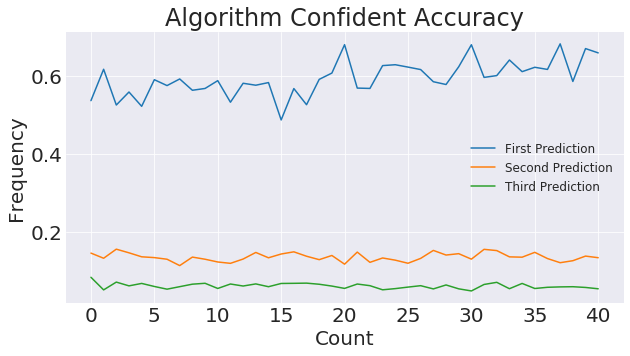

In [350]:
#PLotting the Line Chart for the Algortihm Confident Accuracy With The Moving Average
plt.figure(figsize = (10,5))
plt.plot(Algorithm1 , label = 'First Prediction')
plt.plot(Algorithm2 , label = 'Second Prediction')
plt.plot(Algorithm3 , label = 'Third Prediction')
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.title('Algorithm Confident Accuracy')
plt.legend(loc = 'center right' , fontsize = 12)
plt.show()

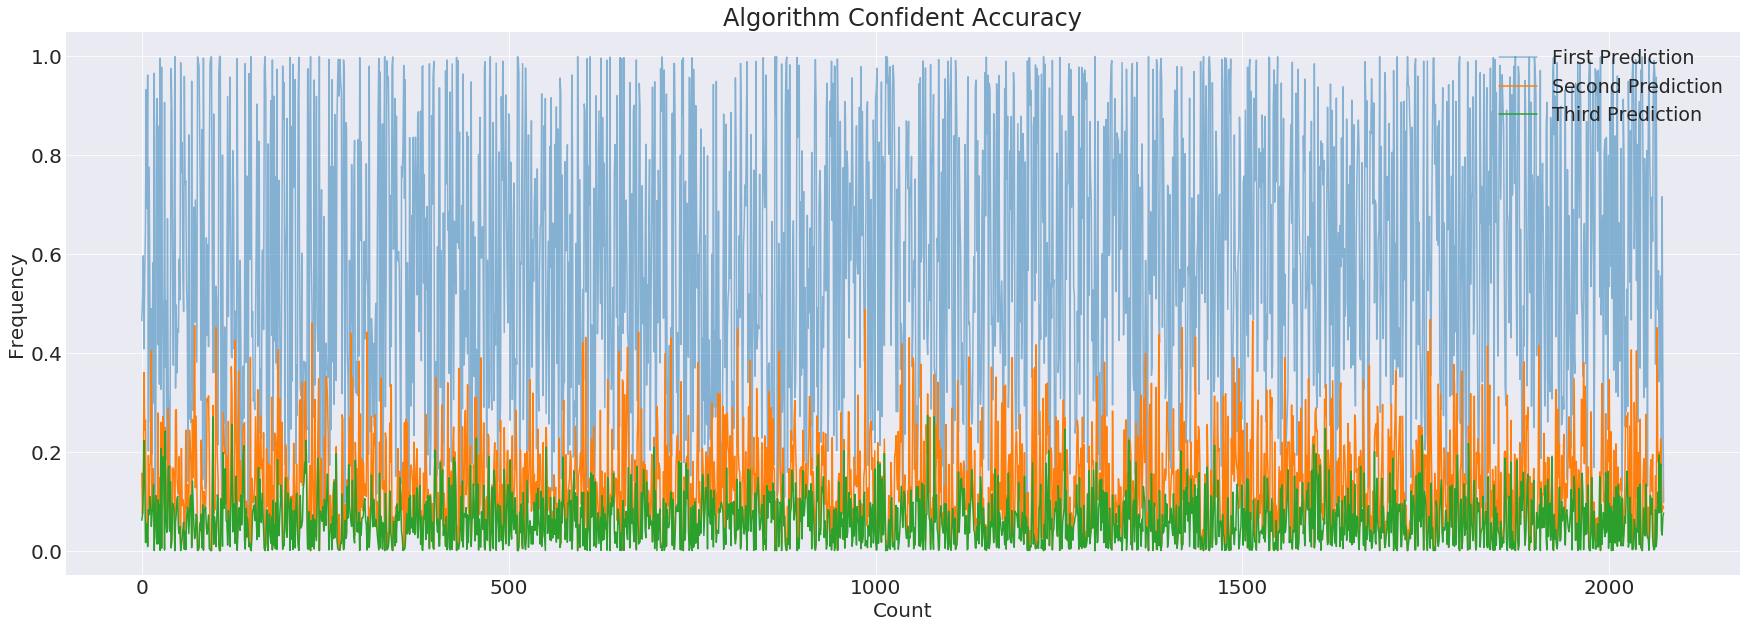

In [351]:
#PLotting the Line Chart for the Algortihm Confident Accuracy Without The Moving Average
plt.figure(figsize=(30,10))
plt.plot(all_data.p1_conf , label = 'First Prediction' , alpha = .5)
plt.plot(all_data.p2_conf , label = 'Second Prediction')
plt.plot(all_data.p3_conf , label = 'Third Prediction')
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.title('Algorithm Confident Accuracy')
plt.legend(loc = 'upper right' , fontsize = 19)
plt.show()

as we can see the algorthim in it's first prediction is high and then drops in the second prediction , the last prediction for the algorthim is very low 